In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import keras
from keras.layers import Dense, Activation, Convolution2D, Reshape, Flatten, ZeroPadding2D
from keras.layers import MaxPooling2D, UpSampling2D, Input, Dropout
from keras.models import Sequential, Model

Using TensorFlow backend.


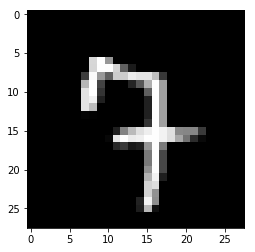

In [3]:
ds = pd.read_csv('train.csv')
mnist = ds.values[:10000]
img = mnist[254,1:].reshape((28,28))
plt.imshow(img, cmap='gray')

In [4]:
xt = mnist[:,1:]/255.0
yt = mnist[:,0]
xt = xt.reshape((xt.shape[0],28,28,1))

split = int(0.45*xt.shape[0])
xval = xt[split:]
yval = yt[split:]

xt = xt[:split]
yt = yt[:split]

In [5]:
inp = Input(shape=(28,28,1))
embedding_shape = 2

#--------------Encoder ------------------#
cnv1 = Convolution2D(32,3,3, border_mode='valid', activation='relu')(inp)

cnv2 = Convolution2D(16,3,3, border_mode='valid', activation='relu')(cnv1)

mxp3 = MaxPooling2D(pool_size=(2,2))(cnv2)

cnv4 = Convolution2D(8,3,3, border_mode='valid', activation='relu')(mxp3)

#--------------Embedding ------------------#
flt5 = Flatten()(cnv4)
flt5 = Dropout(0.4)(flt5)
den6 = Dense(embedding_shape, activation='sigmoid')(flt5)   
den7 = Dense(800, activation='relu')(den6)

res8 = Reshape((10,10,8))(den7)

#-------------- Decoder ------------------#
dcn9 = ZeroPadding2D(padding=(1,1))(res8)
dcn9 = Convolution2D(16,3,3, border_mode='same', activation='relu')(dcn9)

ups10 = UpSampling2D(size=(2,2))(dcn9)

dcn11 = ZeroPadding2D(padding=(1,1))(ups10)
dcn11 = Convolution2D(32,3,3, border_mode='same', activation='relu')(dcn11)

dcn12 = ZeroPadding2D(padding=(1,1))(dcn11)
dcn12 = Convolution2D(1,3,3, border_mode='same', activation='relu')(dcn12)

#-------------- Model ------------------#
model = Model(input=inp, output=dcn12)
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 26, 26, 32)    320         input_1[0][0]                    
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 24, 24, 16)    4624        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 12, 12, 16)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [47]:
hist = model.fit(xt, xt,
                nb_epoch=8,
                shuffle=True,
                batch_size=100,
                validation_data=(xval, xval), verbose=2)

Train on 4500 samples, validate on 5500 samples
Epoch 1/8
22s - loss: 0.0765 - acc: 0.8037 - val_loss: 0.0669 - val_acc: 0.7898
Epoch 2/8
21s - loss: 0.0655 - acc: 0.7973 - val_loss: 0.0640 - val_acc: 0.7905
Epoch 3/8
23s - loss: 0.0632 - acc: 0.7949 - val_loss: 0.0611 - val_acc: 0.7966
Epoch 4/8
22s - loss: 0.0602 - acc: 0.7949 - val_loss: 0.0583 - val_acc: 0.7938
Epoch 5/8
23s - loss: 0.0582 - acc: 0.7945 - val_loss: 0.0568 - val_acc: 0.7971
Epoch 6/8
22s - loss: 0.0570 - acc: 0.7948 - val_loss: 0.0559 - val_acc: 0.7944
Epoch 7/8
23s - loss: 0.0563 - acc: 0.7942 - val_loss: 0.0556 - val_acc: 0.7993
Epoch 8/8
23s - loss: 0.0557 - acc: 0.7948 - val_loss: 0.0548 - val_acc: 0.7927


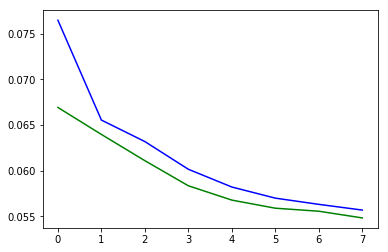

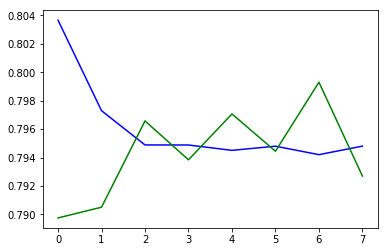

In [48]:
th = hist.history

plt.figure(0)
plt.plot(th['loss'], 'b')
plt.plot(th['val_loss'], 'g')

plt.figure(1)
plt.plot(th['acc'], 'b')
plt.plot(th['val_acc'], 'g')

In [35]:
out = model.predict(xval[:50])

(50, 28, 28, 1) (7000, 28, 28, 1)


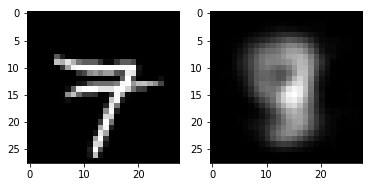

In [41]:
print out.shape, xval.shape
n = 15
plt.subplot(1,2,1)
plt.imshow((xval[n]*255).reshape((28,28)), cmap='gray')
plt.subplot(1,2,2)
plt.imshow((out[n]*255).reshape((28,28)), cmap='gray')